# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

# I had to import a few libraries for specific funcitonality
import pandas as pd

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

C:\Users\Beau\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Beau\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [2]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
mnist = fetch_mldata('MNIST original', data_home='~/datasets/mnist')
X, Y = mnist.data, mnist.target
# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

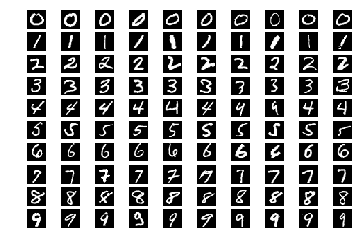

In [3]:
#def P1(num_examples=10):

### STUDENT START ###
plt.rcParams['image.cmap'] = 'gray' #set colormap to grayscale
k=1
for j in range(10):
    example_data = np.where(train_labels == j,1,0)
    example_data = train_data[example_data==1]
    example_data = example_data[0:10]
    for i in range(len(example_data)): 
        #loop through example data, reshaping it into a 28x28 grid, assigning it a subplot, and plotting it
        example=example_data[i].reshape(28,28) # reshape into 28x28 grid
        plt.subplot(10,10,k) #assign the ith subplot to this example
        plt.axis('off') # remove the axes 
        plt.imshow(example) # plot the example digit
        k += 1
### STUDENT END ###
#P1(10)

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [4]:
#def P2(k_values):

### STUDENT START ###
k_values = [1, 3, 5, 7, 9] # instantiate list of k-values
for k in k_values:
    # for each k value, create a classifier with k-neighbors, then fit it, predict with it, and calculate its accuracy
    neigh = KNeighborsClassifier(n_neighbors=k) # instantiate k-nearest neighbors model
    neigh.fit(mini_train_data, mini_train_labels) # train model 
    pred = neigh.predict(dev_data) # predict on dev_data
    cfm = confusion_matrix(dev_labels,pred) # create a confusion matrix to calculate accuracy
    accuracy = sum(cfm.diagonal())/cfm.sum() # calculate the accuracy
    print("The accuracy for {}-nearest neighbors is {}".format(k,accuracy)) # print k and the respective accuracy
    if k == 1:
        print(classification_report(dev_labels, pred))
### STUDENT END ###

#k_values = [1, 3, 5, 7, 9]
#P2(k_values)

The accuracy for 1-nearest neighbors is 0.888
             precision    recall  f1-score   support

        0.0       0.91      0.98      0.94        99
        1.0       0.89      1.00      0.94       105
        2.0       0.99      0.79      0.88       102
        3.0       0.77      0.87      0.82        86
        4.0       0.89      0.82      0.85       104
        5.0       0.93      0.84      0.88        91
        6.0       0.94      0.96      0.95        98
        7.0       0.89      0.92      0.90       113
        8.0       0.94      0.88      0.91        96
        9.0       0.78      0.82      0.80       106

avg / total       0.89      0.89      0.89      1000

The accuracy for 3-nearest neighbors is 0.878
The accuracy for 5-nearest neighbors is 0.869
The accuracy for 7-nearest neighbors is 0.865
The accuracy for 9-nearest neighbors is 0.863


ANSWER: Based on the 1-NN classifier, it is difficult to say which digit is the most difficult to predict. If we consider precision, then 3 seems to be the most difficult to predict. The model is only correct 77% of the time when it predicts 3. If we consider recall, then 2 is the most difficult to predict. Twos are only correctly identifed 79% of the time they appear. If we consider f1-score then 9 is the most difficult to predict. It seems that the digit 9 is the most difficult to predict. It is not entirely clear whether false positives or false negatives would be a worse outcome. Given this, I will use the f1-score to balacne between the two and rule that 9 is the most difficult to predict.

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [13]:
#def P3(train_sizes, accuracies):

### STUDENT START ###
train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000] #instantiate list of training sizes
neigh = KNeighborsClassifier(n_neighbors=1) # instantiate 1-NN classifier
train_sizes_acc = [] # instantiate empty list to hold accuracies

for size in train_sizes:
    # loop through the training sizes, for each fit the model with the data, make predictions on the dev set (and time them), then calculate the accuracy
    neigh.fit(train_data[:size], train_labels[:size]) # fit the model to the training data of size
    start_time = time.time() # start a timer
    pred = neigh.predict(dev_data) # make predictions on dev_data
    end_time = time.time() # stop timer
    print("Time to predict {} examples: {}".format(size,end_time-start_time)) # print out training size, time
    cfm = confusion_matrix(dev_labels,pred) # create a confusion matrix to calculate the accuracy
    accuracy = sum(cfm.diagonal())/cfm.sum() # calculate the accuracy
    train_sizes_acc.append(accuracy) # append accuracy to train_sizes_acc list
    print("Accuracy: ", accuracy) # print accuracy

### STUDENT END ###

#train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
#accuracies = []
#P3(train_sizes, accuracies)

Time to predict 100 examples: 0.1409134864807129
Accuracy:  0.72
Time to predict 200 examples: 0.267833948135376
Accuracy:  0.786
Time to predict 400 examples: 0.719557523727417
Accuracy:  0.841
Time to predict 800 examples: 1.282212495803833
Accuracy:  0.884
Time to predict 1600 examples: 2.577413320541382
Accuracy:  0.902
Time to predict 3200 examples: 5.796436548233032
Accuracy:  0.926
Time to predict 6400 examples: 10.052820682525635
Accuracy:  0.937
Time to predict 12800 examples: 21.297954559326172
Accuracy:  0.959
Time to predict 25000 examples: 40.18149971961975
Accuracy:  0.97


(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

In [35]:
#def P4():

### STUDENT START ###
train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
X = np.asarray(train_sizes) #convert the training size list to an array
X = X.reshape(-1,1) # reshape it to be 1D vector
y = np.asarray(train_sizes_acc) #convert the accuracy list to an array

# NORMAL LINEAR REGRESSION
linreg = LinearRegression() # instantiate a linear regression class
linreg.fit(X,y) # fit the linear regression class
print("Predict(60,000): {}".format(round(float(linreg.predict(60000)),3))) #predict the accuracy of the training class size 60,000

# SIGMOID TRANSFORMATION
y_trans = [num/(1-num) for num in y] # First step in transforming the data transforms percentages to whole numbers
linreg = LinearRegression() # instantiate a linear regression class
linreg.fit(X,y_trans) # fit the linear regression with the transformed output data, y_trans
pred = linreg.predict(60000)
answer = pred/(1+pred)  # Reversing the transforming to get data between 0 and 1
print("Predict(60,000): {}".format(round(float(answer),3))) #predict the accuracy of the training class size 60,000

### STUDENT END ###

#P4()

Predict(60,000): 1.243
Predict(60,000): 0.987


ANSWER: The problem with using regression here is that the data is nonlinear so the linear model cannot correctly approximate it. Transforming the data using a sigmoid function seems to make the predictions more reasonable because it is asymptotic at 1.

Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

4 is most often confused as a 9

 Here are some examples of this:


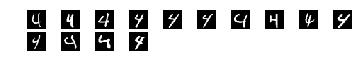

In [5]:
#def P5():

### STUDENT START ###
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(mini_train_data, mini_train_labels)
pred = neigh.predict(dev_data)
cfm = confusion_matrix(dev_labels, pred)

cfm_perc = np.apply_along_axis(lambda r: 100.0 * r/r.sum(), 0, cfm) #convert confusion matrix from absolute numbers to percents
a = cfm_perc # assign cfm_perc to a to preserve original cfm_perc matrix
np.fill_diagonal(a, 0) # fill the diagonals of a with 0 to remove the correctly classified cases
i,j = np.unravel_index(a.argmax(), a.shape) # identify the digit (i) most misclassified as another(j)
print("{} is most often confused as a {}".format(i,j)) # print out the digit and what it is confused with
print("\n Here are some examples of this:")


incorrects = np.array(np.nonzero(neigh.predict(dev_data).reshape((-1,)) != dev_labels))[0] # identify location of all mislabeled predictions
i_s = np.where(dev_labels[incorrects] == i, 1, 0) # identify location of all mislabeled fours
j_s = np.where(pred[incorrects] == j, 1, 0) # identify location of all predictions of 9 that are incorrect
misses = np.where(i_s + j_s == 2, 1, 0) # identify location of fours (i_s) predicted as nines (j_s)

# example_labels = np.where(dev_labels[incorrects] == i, 1,0)

example_data = dev_data[incorrects[misses==1]] # select the dev_data where these confusions occured

plt.rcParams['image.cmap'] = 'gray' #set colormap to grayscale
k=1
for h in range(len(example_data)): 
    #loop through example data, reshaping it into a 28x28 grid, assigning it a subplot, and plotting it
    example=example_data[h].reshape(28,28) # reshape into 28x28 grid
    plt.subplot(10,10,k) #assign the kth subplot to this example
    plt.axis('off') # remove the axes 
    plt.imshow(example) # plot the example digit
    k +=1
### STUDENT END ###

#P5()

(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

In [4]:
#def P6():
    
### STUDENT START ###

def MeanBlur(image, width=30, height=30):
    """Function to blur MNIST image using simple mean with 3x3 sliding window and padding."""
    image = image.reshape(width-2,height-2) # Reshape the image to be (28,28) from (784,)
    image = np.pad(image,1,mode='constant') # Pad the image with zeros around the edge
    image = image.reshape(width,height) # Reshape the image to have (30,30) to account for padding
    frame = [] # Initialize frame list to hold each value in 3x3 window
    for i in range(width-1):
        # Slide window across image, calculating the mean for each 3x3 window
         for j in range(height-1):
            frame.append(image[i-1][j-1]) # append pixel above and left
            frame.append(image[i-1][j]) # append pixel above
            frame.append(image[i-1][j+1]) # append pixel above and right
            frame.append(image[i,j-1]) # append pixel to left
            frame.append(image[i,j]) # append center pixel
            frame.append(image[i,j+1]) # append pixel to right
            frame.append(image[i+1,j-1]) # append pixel below and left
            frame.append(image[i+1,j]) # append pixel below
            frame.append(image[i+1,j+1]) # append pixel below and right
            image[i][j] = np.mean(frame) # Assign the mean of the frame to the pixel in the center
            frame = [] # reset the frame for the next window
    image = image[1:-1,1:-1] # Trim the padding off the image
    blurred = image.flatten() # flatten the image back to (784,)
    return blurred

blur_train_data = np.apply_along_axis(MeanBlur, 1, mini_train_data) 
blur_dev_data = np.apply_along_axis(MeanBlur, 1, dev_data)

# BLUR NEITHER
# Instantiate, fit, predict, and score KNN without blurring any data
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(mini_train_data, mini_train_labels)
pred = clf.predict(dev_data)
cfm = confusion_matrix(dev_labels, pred) # create a confusion matrix
accuracy = sum(cfm.diagonal())/cfm.sum() # calculate the accuracy of the model
print("Blurring neither training nor dev data accuracy: ",accuracy)

# BLUR TRAINING DATA
# Instantiate, fit, predict, and score KNN, blurring the training data
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(blur_train_data, mini_train_labels)
pred = clf.predict(dev_data)
cfm = confusion_matrix(dev_labels, pred) # create a confusion matrix
accuracy = sum(cfm.diagonal())/cfm.sum() # calculate the accuracy of the model
print("Blurring training but not dev data accuracy: ",accuracy)

# BLUR DEV DATA
# Instantiate, fit, predict, and score KNN, blurring the dev data
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(mini_train_data, mini_train_labels)
pred = clf.predict(blur_dev_data)
cfm = confusion_matrix(dev_labels, pred) # create a confusion matrix
accuracy = sum(cfm.diagonal())/cfm.sum() # calculate the accuracy of the model
print("Not blurring the training data but blurring the dev data accuracy: ", accuracy)

# BLUR TRAINING AND DEV DATA
# Instantiate, fit, predict, and score KNN, blurring both the training and dev data
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(blur_train_data, mini_train_labels)
pred = clf.predict(blur_dev_data)
cfm = confusion_matrix(dev_labels, pred) # create a confusion matrix
accuracy = sum(cfm.diagonal())/cfm.sum() # calculate the accuracy of the model
print("Blurring both the training and dev data accuracy: ", accuracy)

### STUDENT END ###

#P6()

Blurring neither training nor dev data accuracy:  0.888
Blurring training but not dev data accuracy:  0.898
Not blurring the training data but blurring the dev data accuracy:  0.86
Blurring both the training and dev data accuracy:  0.902


ANSWER: Blurring only the training data seems to improve accuracy while blurring only the dev data does not. The best accuracy is achieved when both the training and dev data are blurred.

(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

In [10]:
#def P7():

### STUDENT START ###

bnb = BernoulliNB(binarize=0.5) # instantiate a Bernoulli Naive Bayes model
bnb.fit(train_data, train_labels) # train the model
pred = bnb.predict(dev_data) # predict on the dev_data
cfm = confusion_matrix(dev_labels, pred) # create a confusion matrix
accuracy = sum(cfm.diagonal())/cfm.sum() # calculate the accuracy of the model
print("The accuracy for the Bernoulli Naive Bayes model is {}".format(accuracy)) # print the accuracy

mnb_train_data = np.where(train_data < 0.25, 0, np.where(train_data<0.75,1,2)) # threshold the data into 0, 1, 2 
mnb = MultinomialNB() # instantiate a Multinomial Naive Bayes model
mnb.fit(train_data,train_labels) # train the model
pred = mnb.predict(dev_data) # predict on the dev_data
cfm = confusion_matrix(dev_labels, pred) # create a confusion matrix
accuracy = sum(cfm.diagonal())/cfm.sum() # calculate the accuracy of the model
print("The accuracy for the Multinomial Naive Bayes model is {}".format(accuracy)) # print the accuracy
### STUDENT END ###
#P7()

The accuracy for the Bernoulli Naive Bayes model is 0.845
The accuracy for the Multinomial Naive Bayes model is 0.826


ANSWER: The MultinomialNB model does not improve the results. This is likely because by increasing the feature space so much it violates the independence assumption of Naive Bayes. For example, if there is a high probability that a pixel is on, then the probablity the pixel next to it is on is NOT necesarilly an independent event. MultinomialNB does take into account the probabilities of features so it could be overfitting. BernoulliNB merely counts whether the feature occured, but does not calculate the probability so in this case it is less likely to overfit to the probabilities derived from training data. 

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [6]:
#def P8(alphas):

### STUDENT START ###
parameters = [{'alpha':[0,0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}] # Create list of dicts of parameters (in this case one parameter, alpha)
gs = GridSearchCV(BernoulliNB(binarize=0.5), parameters, scoring='accuracy') # Instantiate a GridSearch of the BernoulliNB model, using accuracy as the scoring method
gs.fit(train_data, train_labels) # fit to the training data
print("The best value for alpha was {} with an accuracy of {}.".format(gs.best_params_['alpha'], gs.best_score_)) # print the parameter with the best accuracy
print("The accuracy when alpha=0 was {}.".format(round(gs.grid_scores_[0][1],4))) # Print the accuracy when alpha=0
### STUDENT END ###

#alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
#nb = P8(alphas)

C:\Users\Beau\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:474: UserWarning: Changed by Beau to ignore MIN ALPHA CHECK, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\Beau\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:822: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -
C:\Users\Beau\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:474: UserWarning: Changed by Beau to ignore MIN ALPHA CHECK, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\Beau\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:822: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -
C:\Users\Beau\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:474: UserWarning: Changed by Beau to ignore MIN ALPHA CHECK, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\Beau\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:822: RuntimeWarning: divide 

The best value for alpha was 0.0001 with an accuracy of 0.8369.
The accuracy when alpha=0 was 0.0989.


ANSWER: For alpha=0 this makes sense. Smoothing, by adjusting alpha, allows the model to better generalize to new data. An alpha of 0, means there is no smoothing. Without smoothing the data we are implicitly assuming that there is infinite training data and thus MLE is the best estimator. This is objectively not true and hence the accuracy when alpha is 0 is very low.

(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

In [11]:
#def P9():

### STUDENT END ###

clf = GaussianNB() # Instantiate a Gaussian Naive Bayes Model
clf.fit(train_data, train_labels) # Fit the model to the training data
sigs = [0.0001, 0.001, 0.01, 0.1, 0.15, 0.5, 1.0, 2.0] # Instantiate a list  to tune sigma
thets = [0.0001, 0.001, 0.01, 0.1, 0.15, 0.5, 1.0, 2.0] # Instantiate a list to tune theta


# MANUAL GRID SEARCH
# Empty variables to hold answers
max_acc = 0
best_sigma = 0
best_theta = 0
for s in sigs:
    # For each instance in sigs, scale sigma by it, then scale theta by each instance,
    # checking for which combination produces the maximum accuracy
    clf.sigma_ = clf.sigma_ * s # scale sigma_ by s from sigs
    for t in thets:
        clf.theta_ = clf.theta_ * t # scale theta_ by t from thets
        pred = clf.predict(dev_data) # predict now that sigma_ and theta_ have been adjusted
        cfm = confusion_matrix(dev_labels, pred) # create a confusion matrix to calculate accuracy
        accuracy = sum(cfm.diagonal())/cfm.sum() # calculate accuracy from confusion matrix
        if accuracy > max_acc:
            # check if the accuracy calculated is greater than the maximum accuracy yet achieved,
            # if so then reset the maximum accuracy to it and record the sigma and theta that 
            # achieved this result
            max_acc = accuracy
            best_sigma = s
            best_theta = t
        clf.theta_ = clf.theta_ / t # reset theta to original values
    clf.sigma_ = clf.sigma_ / s # reset sigma to original values
print("The best accuracy, {}, is achieved when scaling sigma by {} and theta by {}".format(max_acc, best_sigma, best_theta))
### STUDENT END ###
#clf = P9()

The best accuracy, 0.826, is achieved when scaling sigma by 0.001 and theta by 1.0


ANSWER: I performed a manual grid search to tune theta and sigma. Scaling sigma down by 0.001 and keeping theta as it is (scaling by 1) produced the best accuracy. 

(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

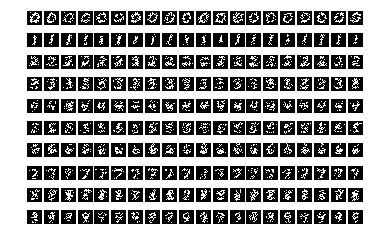

In [13]:
#def P10(num_examples):

### STUDENT START ###
bnb = BernoulliNB(binarize=0.5, alpha=0.0001) # Instantiate a Bernoulli Naive Bayes model
bnb.fit(train_data, train_labels) # train the model
dist = np.exp(bnb.feature_log_prob_) # convert the log probabilities of the features back to probabilities
k=1
for digit in range(len(dist)):
    # for each digit, take a vector length 784 drawn from the uniform distribution, 
    # compare each component to the probability vector for the digit to turn the pixel on or off, 
    # then plot this example. Do this 20 times for each digit.
     for num in range(20):
        random = np.random.rand(784) # create a vector length 784 with components drawn from uniform distribution
        example = np.where(random < dist[digit], 1,0) # compare the given random vector to the feature probabilities for the given digit, if it is less than the probability turn the pixel off (black,1)
        plt.subplot(10,20,k) #assign the ith subplot to this example
        plt.axis('off') # remove the axes 
        plt.imshow(example.reshape(28,28)) # plot this example
        k += 1
        
### STUDENT END ###

#P10(20)

ANSWER: The generated digits are much rougher than the training digits. They look like a smudged version of each digit.

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

In [14]:
#def P11(buckets, correct, total):
    
### STUDENT START ###
clf = BernoulliNB(binarize=0.5, alpha = 0.0001) # Instantiate a Bernoulli Naive Bayes Model
clf.fit(train_data, train_labels) # Fit the training data
pred = clf.predict(dev_data) # Predict on the dev data
pred_probs = clf.predict_proba(dev_data) # Retrieve the probability estimates for each digit

max_probs = np.array([max(pred_probs[i]) for i in range(len(pred_probs))]) # Find the maximum  posetrior (digit) for each piece of dev data 
hit_or_miss = np.array(pred == dev_labels) # Record if the maximum probability was correct or incorrect


buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

for i in range(len(buckets)):
    # For each threshold, find all cases with a maximum posterior greater than the threshold
    # record the number of cases and the number of correct classifications from those cases
    cases = max_probs > buckets[i] # Select only posteriors greater than threshold
    total[i] = sum(cases) # record the number of cases
    correct[i] = sum(hit_or_miss[cases] == 1) # record the number of correctly classified cases

for i in range(len(buckets)):
    # For each threshold, calculate and record the accuracy
    accuracy = 0.0 # Initialize accuracy
    if (total[i] > 0): accuracy = correct[i] / total[i] # Record accuracy if number of correct classifications is greater than zero
    print("p(pred) <= %.13f    total = %3d    accuracy = %.3f" %(buckets[i], total[i], accuracy))


### STUDENT END ###

#buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
#correct = [0 for i in buckets]
#total = [0 for i in buckets]

#P11(buckets, correct, total)

#for i in range(len(buckets)):
#    accuracy = 0.0
#    if (total[i] > 0): accuracy = correct[i] / total[i]
#    print 'p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy)

p(pred) <= 0.5000000000000    total = 997    accuracy = 0.852
p(pred) <= 0.9000000000000    total = 957    accuracy = 0.863
p(pred) <= 0.9990000000000    total = 860    accuracy = 0.905
p(pred) <= 0.9999900000000    total = 785    accuracy = 0.930
p(pred) <= 0.9999999000000    total = 722    accuracy = 0.949
p(pred) <= 0.9999999990000    total = 652    accuracy = 0.957
p(pred) <= 0.9999999999900    total = 577    accuracy = 0.965
p(pred) <= 0.9999999999999    total = 496    accuracy = 0.972
p(pred) <= 1.0000000000000    total =   0    accuracy = 0.000


ANSWER: For the most part the classifier seems to be weakly calibrated. The model is more accurate as the posteriors increase. However, the model seems far from well calibrated and appears to be overconfident in its assessment of probabilities.

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

In [10]:
#def P12():

### STUDENT START ###
def RowColSum(vector):
    """Appends the sums of the rows, columns, and full matrix of image to end of image."""
    image = vector.reshape(28,28)
    colsum = np.sum(image, axis=0)
    rowsum = np.sum(image, axis=1)
    fullsum = np.sum(image)
    image = np.append(image, colsum)
    image = np.append(image, rowsum)
    image = np.append(image, fullsum)
    return image

mini_train_data_sum = np.apply_along_axis(RowColSum, 1, mini_train_data)
dev_data_sum = np.apply_along_axis(RowColSum, 1, dev_data)

parameters = [{'alpha':[0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0],'binarize':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,0.9,1]}] # Create list of dicts of parameters
gs = GridSearchCV(BernoulliNB(), parameters, scoring='accuracy') # Instantiate a GridSearch of the BernoulliNB model, using accuracy as the scoring method
gs.fit(mini_train_data, mini_train_labels) # fit to the training data
print("The best model without modifying the data was with an alpha of {} binarized on {} with an accuracy of {}.".format(gs.best_params_['alpha'],gs.best_params_['binarize'], round(gs.best_score_,4))) # print the parameter with the best accuracy

gs = GridSearchCV(BernoulliNB(), parameters, scoring='accuracy') # Instantiate a GridSearch of the BernoulliNB model, using accuracy as the scoring method
gs.fit(mini_train_data_sum, mini_train_labels) # fit to the training data
print("The best model when summing the rows and columns was with an alpha of {} binarized on {} with an accuracy of {}.".format(gs.best_params_['alpha'],gs.best_params_['binarize'], round(gs.best_score_,4))) # print the parameter with the best accuracy


### STUDENT END ###

#P12()

The best model without modifying the data was with an alpha of 0.01 binarized on 0.3 with an accuracy of 0.829.
The best model when summing the rows and columns was with an alpha of 0.001 binarized on 0.5 with an accuracy of 0.829.


I tried summing the pixel values of each row and column but this does not seem to improve the accuracy of the model. A puzzle to be sure. I am not sure that this qualifies for extra credit as I did not improve the model's performance but I want to include it regardless.